In [46]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import json 
import os 
from pandas import json_normalize

In [47]:
df_train = pd.read_csv("train.csv")

/Users/tianqichen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
df_train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [49]:
#clean data
nrows=None
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
df = pd.read_csv('train.csv', converters={column: json.loads for column in columns},dtype={'fullVisitorID':'str'}, nrows=nrows)
for column in columns:
    column_converted = json_normalize(df[column])
    column_converted.columns = [f"{column}_{subcolumn}" for subcolumn in column_converted.columns]
    df = df.drop(column, axis=1).merge(column_converted, right_index=True, left_index=True)

/Users/tianqichen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [50]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df = df.loc[:,['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId', 'visitNumber', 'device_browser', 'device_operatingSystem', 'device_isMobile', 'geoNetwork_country', 'trafficSource_source', 'totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_transactionRevenue']]
df = df.fillna(value=0)
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_country,trafficSource_source,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,Chrome,Windows,False,Turkey,google,1,1,1,1,0
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,Firefox,Macintosh,False,Australia,google,1,1,1,1,0
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,Chrome,Windows,False,Spain,google,1,1,1,1,0
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,UC Browser,Linux,False,Indonesia,google,1,1,1,1,0
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,Chrome,Android,True,United Kingdom,google,1,1,1,1,0


In [52]:
# convert object to str
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].astype(str)

In [53]:
df.channelGrouping.unique()

array(['Organic Search', 'Referral', 'Paid Search', 'Affiliates',
       'Direct', 'Display', 'Social', '(Other)'], dtype=object)

In [54]:
df.channelGrouping = df.channelGrouping.replace("(Other)", "Others")

In [55]:
df.device_isMobile.unique()

array([False,  True])

In [56]:
df.device_isMobile.astype

<bound method NDFrame.astype of 0         False
1         False
2         False
3         False
4          True
          ...  
903648    False
903649     True
903650     True
903651    False
903652     True
Name: device_isMobile, Length: 903653, dtype: bool>

In [57]:
df.device_isMobile = df.device_isMobile.astype(str)

In [58]:
df.device_isMobile.astype

<bound method NDFrame.astype of 0         False
1         False
2         False
3         False
4          True
          ...  
903648    False
903649     True
903650     True
903651    False
903652     True
Name: device_isMobile, Length: 903653, dtype: object>

In [59]:
df.loc[df.device_isMobile == "False", "device"] = "Desktop"
df.loc[df.device_isMobile == "True", "device"] = "Mobile"

In [60]:
df.geoNetwork_country.unique()
df.geoNetwork_country = df.geoNetwork_country.replace("(not set)", "Others")

In [61]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_country,trafficSource_source,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,device
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,Chrome,Windows,False,Turkey,google,1,1,1,1,0,Desktop
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,Firefox,Macintosh,False,Australia,google,1,1,1,1,0,Desktop
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,Chrome,Windows,False,Spain,google,1,1,1,1,0,Desktop
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,UC Browser,Linux,False,Indonesia,google,1,1,1,1,0,Desktop
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,Chrome,Android,True,United Kingdom,google,1,1,1,1,0,Mobile


In [62]:
pd.set_option('mode.chained_assignment', None)

df['traffic_source'] = df.trafficSource_source

main_traffic_source = ["google","baidu","bing","yahoo","facebook","youtube","duckduckgo","quora",
                      "reddit","linkedin","messenger","pinterest","yandex","twitter"]

df.traffic_source[df.traffic_source.str.contains("google")] = "google"
df.traffic_source[df.traffic_source.str.contains("baidu")] = "baidu"
df.traffic_source[df.traffic_source.str.contains("bing")] = "bing"
df.traffic_source[df.traffic_source.str.contains("yahoo")] = "yahoo"
df.traffic_source[df.traffic_source.str.contains("facebook")] = "facebook"
df.traffic_source[df.traffic_source.str.contains("youtube")] = "youtube"
df.traffic_source[df.traffic_source.str.contains("duckduckgo")] = "duckduckgo"
df.traffic_source[df.traffic_source.str.contains("quora")] = "quora"
df.traffic_source[df.traffic_source.str.contains("reddit")] = "reddit"
df.traffic_source[df.traffic_source.str.contains("linkedin")] = "linkedin"
df.traffic_source[df.traffic_source.str.contains("lnkd")] = "linkedin"
df.traffic_source[df.traffic_source.str.contains("messenger")] = "messenger"
df.traffic_source[df.traffic_source.str.contains("pinterest")] = "pinterest"
df.traffic_source[df.traffic_source.str.contains("yandex")] = "yandex"
df.traffic_source[df.traffic_source.str.contains("twitter")] = "twitter"
df.traffic_source[~df.traffic_source.isin(main_traffic_source)] = "Others"

In [63]:
df['deviceBrowser'] = df.device_browser

main_device_browser = ["Chrome","Safari","Firefox","Internet Explorer","Edge",
                      "Opera","UC Browser","YaBrowser","Coc Coc"]

df.deviceBrowser[df.deviceBrowser.str.contains("Chrome")] = "Chrome"
df.deviceBrowser[df.deviceBrowser.str.contains("Safari")] = "Safari"
df.deviceBrowser[df.deviceBrowser.str.contains("Firefox")] = "Firefox"
df.deviceBrowser[df.deviceBrowser.str.contains("Internet Explorer")] = "Internet Explorer"
df.deviceBrowser[df.deviceBrowser.str.contains("Edge")] = "Edge"
df.deviceBrowser[df.deviceBrowser.str.contains("Opera")] = "Opera"
df.deviceBrowser[df.deviceBrowser.str.contains("UC Browser")] = "UC Browser"
df.deviceBrowser[df.deviceBrowser.str.contains("YaBrowser")] = "YaBrowser"
df.deviceBrowser[df.deviceBrowser.str.contains("Coc Coc")] = "Coc Coc"
df.deviceBrowser[~df.deviceBrowser.isin(main_device_browser)] = "Others"

In [64]:
df.device_operatingSystem.unique()
df.device_operatingSystem = df.device_operatingSystem.replace("(not set)", "Others")

In [65]:
df.drop(columns=["device_isMobile"], inplace=True)

In [66]:
# convert type object to int 
columns_to_numeric = ['totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_transactionRevenue']

for i in columns_to_numeric:
    df[i] = pd.to_numeric(df[i])

In [67]:
df_groupby = df.groupby(['fullVisitorId', 'channelGrouping', 'geoNetwork_country', 'traffic_source',
                         'device', 'device_browser', 'device_operatingSystem']).agg({
                        'totals_hits':'sum', 'totals_pageviews':'sum', 'totals_bounces':'sum',
                        'totals_transactionRevenue':'sum'}).reset_index()

In [68]:
df_groupby = df_groupby.sort_values(by='totals_transactionRevenue', ascending=False).reset_index(drop=True)

In [69]:
df_groupby.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,device_browser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,1957458976293878100,Display,United States,Others,Desktop,Firefox,Windows,2378,1998,4,59257930000
1,1957458976293878100,Direct,United States,Others,Desktop,Firefox,Windows,1370,1134,3,17855500000
2,5632276788326171571,Direct,United States,Others,Desktop,Chrome,Windows,153,105,2,16023750000
3,9417857471295131045,Direct,United States,Others,Desktop,Chrome,Windows,696,466,0,15170120000
4,4471415710206918415,Referral,United States,google,Desktop,Chrome,Macintosh,238,194,6,11211100000


In [70]:
df_groupby.totals_transactionRevenue = df_groupby.totals_transactionRevenue.apply(lambda x: round(x/100000,-1))

In [71]:
df_groupby.describe()

,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
count,740920.000000,740920.000000,740920.000000,740920.000000
mean,5.606105,4.694793,0.608203,20.787143
std,16.399265,12.439412,0.845339,911.595791
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000
75%,4.000000,4.000000,1.000000,0.000000
max,2912.000000,2318.000000,123.000000,592580.000000


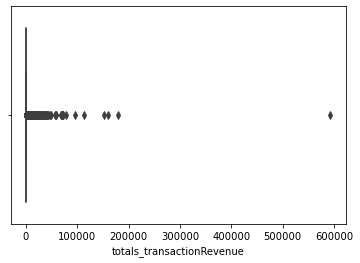

In [72]:
sns.boxplot(df_groupby.totals_transactionRevenue)

In [73]:
df_groupby = df_groupby.loc[df_groupby.totals_transactionRevenue < 200000]

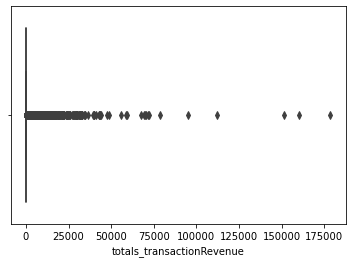

In [74]:
sns.boxplot(df_groupby.totals_transactionRevenue)

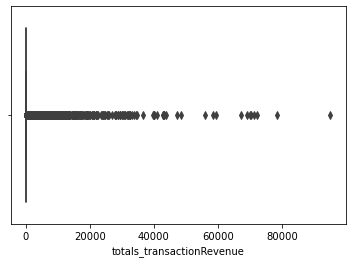

In [75]:
df_groupby = df_groupby.loc[df_groupby.totals_transactionRevenue < 100000]
sns.boxplot(df_groupby.totals_transactionRevenue)

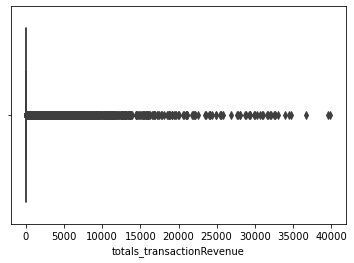

In [76]:
df_groupby = df_groupby.loc[df_groupby.totals_transactionRevenue < 40000]
sns.boxplot(df_groupby.totals_transactionRevenue)

In [77]:
df_groupby = df_groupby.loc[df_groupby.totals_transactionRevenue < 35000]

In [78]:
df_groupby

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,device_browser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
29,2446685875964479851,Organic Search,United States,google,Desktop,Safari,Macintosh,732,544,0,34780.0
30,7113011772090059658,Direct,United States,Others,Desktop,Chrome,Macintosh,239,173,3,34540.0
31,4067986469497332117,Organic Search,Japan,google,Desktop,Chrome,Macintosh,104,88,6,33890.0
32,6052206455243513477,Referral,Nigeria,google,Desktop,Chrome,Macintosh,52,43,0,33020.0
33,8197879643797712877,Organic Search,United States,google,Desktop,Chrome,Chrome OS,754,575,4,32660.0
...,...,...,...,...,...,...,...,...,...,...,...
740915,3882015402297644220,Direct,Belgium,Others,Desktop,Chrome,Macintosh,6,6,1,0.0
740916,3882017508929033318,Organic Search,South Africa,google,Desktop,Chrome,Windows,5,5,0,0.0
740917,3882020084448825424,Social,Egypt,youtube,Desktop,Chrome,Windows,2,2,0,0.0
740918,388202049459152394,Social,United States,Others,Mobile,Safari (in-app),iOS,1,1,1,0.0


In [79]:
df_groupby = df_groupby.reset_index(drop=True)

In [80]:
df_groupby

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,device_browser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,2446685875964479851,Organic Search,United States,google,Desktop,Safari,Macintosh,732,544,0,34780.0
1,7113011772090059658,Direct,United States,Others,Desktop,Chrome,Macintosh,239,173,3,34540.0
2,4067986469497332117,Organic Search,Japan,google,Desktop,Chrome,Macintosh,104,88,6,33890.0
3,6052206455243513477,Referral,Nigeria,google,Desktop,Chrome,Macintosh,52,43,0,33020.0
4,8197879643797712877,Organic Search,United States,google,Desktop,Chrome,Chrome OS,754,575,4,32660.0
...,...,...,...,...,...,...,...,...,...,...,...
740886,3882015402297644220,Direct,Belgium,Others,Desktop,Chrome,Macintosh,6,6,1,0.0
740887,3882017508929033318,Organic Search,South Africa,google,Desktop,Chrome,Windows,5,5,0,0.0
740888,3882020084448825424,Social,Egypt,youtube,Desktop,Chrome,Windows,2,2,0,0.0
740889,388202049459152394,Social,United States,Others,Mobile,Safari (in-app),iOS,1,1,1,0.0


In [81]:
data = df_groupby.iloc[:, 7:]

In [82]:
data.shape

(740891, 4)

In [83]:
data.head()

,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,732,544,0,34780.0
1,239,173,3,34540.0
2,104,88,6,33890.0
3,52,43,0,33020.0
4,754,575,4,32660.0


In [84]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [85]:
#creat a pipeline including StandardScaler and PCA 
steps = [('scaler', StandardScaler()),
        ('PCA', PCA(n_components=3))]
pipeline = Pipeline(steps)
dataframe = pipeline.fit_transform(data)
dataframe = pd.DataFrame(dataframe)

In [86]:
# convert dataframe to nparray 
data_array = np.array(data)

In [87]:
data_array.shape

(740891, 4)

In [88]:
#Kmeans
def k_means(data_array, K, T, B, centroids):
    #centroids = np.zeros(K)
    movieNum, features = data_array.shape
    #centroids = movies[np.random.randint(0, movieNum, K)]     #initialize the centroids
    nearestCenter = np.zeros(B,dtype='int32')
    center = np.zeros(K)
    for i in range(T):
        batchSamplesIndex = np.random.randint(0, movieNum, B)
        batchSamples = data_array[batchSamplesIndex]
        for j in range(B):
            distance = np.linalg.norm(batchSamples[j]-centroids,2,1)
            nearestCenter[j] = np.argmin(distance)
        for k in range(B):
            c = nearestCenter[k]
            center[c] += 1 
            eta = 1 / center[c]
            centroids[c] = (1 - eta) * centroids[c] + eta * batchSamples[k]
    return centroids 

In [89]:
#Kmean++
def kmeanplusplus(data_array, centroidsNum):
    row, column = data_array.shape
    centroids = np.zeros((centroidsNum, column))
    centroids[0] = data_array[np.random.randint(0, row)]
    distanceMin = np.full(row,np.inf)
    for i in range(1,centroidsNum):
        distanceSum = 0
        distanceMin = np.minimum(distanceMin,np.linalg.norm(data_array - centroids[i],2,1))
        distanceSum = sum(distanceMin)
        p = distanceMin / distanceSum
        index = np.random.choice(list(range(row)),p=p)
        centroids[i] = data_array[index]
    return centroids

In [91]:
kmeansMeanDistance = []
kmeansPlusPlusMeanDistance = []
rows, features = data_array.shape
kRange = [2, 3, 4, 5, 6, 8, 10, 15]
T = 1000
B = 100
for K in kRange:
    distanceMin = 0
    distanceMax = 0
    allPointsDistance = []
    allPointsDistancePlus = []
    kmeanCentroidsIni = data_array[np.random.randint(0, rows, K)]
    kmeansCentroids = k_means(data_array, K, T, B, kmeanCentroidsIni)
    for i in range(rows):
        distanceToAllCentroids = np.linalg.norm(data_array[i]-kmeansCentroids,2,1)
        distance = np.linalg.norm(data_array[i]-kmeansCentroids[np.argmin(distanceToAllCentroids)])
        #if(distance == 0):
            #print('!')
        allPointsDistance.append(distance)
    meanDistance = sum(allPointsDistance) / rows 
    kmeansMeanDistance.append(meanDistance)
    # KmeanPlusPlus
    centroidsInitialization = kmeanplusplus(data_array, K)
    kmeansPlusPlusCentroids = k_means(data_array, K, T, B, centroidsInitialization)
    for i in range(rows):
        distanceToAllCentroids = np.linalg.norm(data_array[i]-kmeansPlusPlusCentroids,2,1)
        distance = np.linalg.norm(data_array[i]-kmeansPlusPlusCentroids[np.argmin(distanceToAllCentroids)])
        allPointsDistancePlus.append(distance)
    meanDistancePlus = sum(allPointsDistancePlus) / rows 
    kmeansPlusPlusMeanDistance.append(meanDistancePlus)

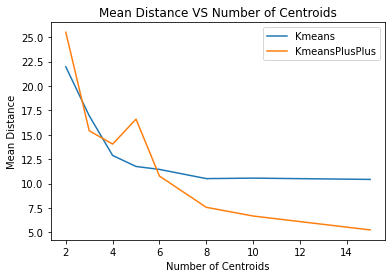

In [92]:
plt.plot(kRange,kmeansMeanDistance, label='Kmeans')
plt.plot(kRange,kmeansPlusPlusMeanDistance,label='KmeansPlusPlus')
#plt.ylim((0,500))
plt.title('Mean Distance VS Number of Centroids')
plt.xlabel('Number of Centroids')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

In [93]:
# based on the elbow method, choose number of clusters to be 4
K = 4
T = 1000
B = 100
rows, _ = data_array.shape
centroidsInitialization = kmeanplusplus(data_array, K)
kmeansPlusPlusCentroids = k_means(data_array, K, T, B, centroidsInitialization)
label_4 = np.zeros(rows)
#assginments
for i in range(rows):
    distance = np.linalg.norm(data_array[i]-kmeansPlusPlusCentroids,2,1)
    label_4[i] = np.argmin(distance)

In [94]:
label_4.shape

(740891,)

In [96]:
label_4_Df = pd.DataFrame(label_4,columns=["labels"]).astype(int)

In [98]:
df_kmeans_4 = pd.concat([df_groupby, label_4_Df], axis=1)

In [99]:
df_kmeans_4

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,device_browser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,labels
0,2446685875964479851,Organic Search,United States,google,Desktop,Safari,Macintosh,732,544,0,34780.0,3
1,7113011772090059658,Direct,United States,Others,Desktop,Chrome,Macintosh,239,173,3,34540.0,3
2,4067986469497332117,Organic Search,Japan,google,Desktop,Chrome,Macintosh,104,88,6,33890.0,3
3,6052206455243513477,Referral,Nigeria,google,Desktop,Chrome,Macintosh,52,43,0,33020.0,3
4,8197879643797712877,Organic Search,United States,google,Desktop,Chrome,Chrome OS,754,575,4,32660.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
740886,3882015402297644220,Direct,Belgium,Others,Desktop,Chrome,Macintosh,6,6,1,0.0,0
740887,3882017508929033318,Organic Search,South Africa,google,Desktop,Chrome,Windows,5,5,0,0.0,0
740888,3882020084448825424,Social,Egypt,youtube,Desktop,Chrome,Windows,2,2,0,0.0,0
740889,388202049459152394,Social,United States,Others,Mobile,Safari (in-app),iOS,1,1,1,0.0,0


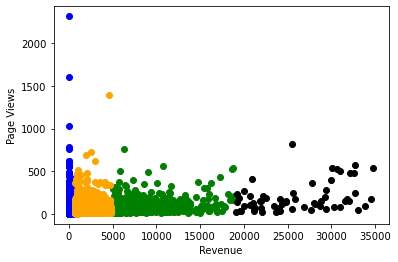

In [100]:
plt.scatter(df_kmeans_4.totals_transactionRevenue[df_kmeans_4.labels == 0],
            df_kmeans_4.totals_pageviews[df_kmeans_4.labels == 0], c='blue')

plt.scatter(df_kmeans_4.totals_transactionRevenue[df_kmeans_4.labels == 1],
            df_kmeans_4.totals_pageviews[df_kmeans_4.labels == 1], c='green')

plt.scatter(df_kmeans_4.totals_transactionRevenue[df_kmeans_4.labels == 2],
            df_kmeans_4.totals_pageviews[df_kmeans_4.labels == 2], c='orange')

plt.scatter(df_kmeans_4.totals_transactionRevenue[df_kmeans_4.labels == 3],
            df_kmeans_4.totals_pageviews[df_kmeans_4.labels == 3], c='black')

#plt.scatter(df_kmeans_5.totals_transactionRevenue[df_kmeans_5.labels == 4],
#            df_kmeans_5.totals_pageviews[df_kmeans_5.labels == 4], c='purple')

plt.ylabel("Page Views")
plt.xlabel("Revenue")

plt.show()

In [102]:
df_group0 = df_kmeans_4.loc[df_kmeans_4.labels == 0] 
df_group1 = df_kmeans_4.loc[df_kmeans_4.labels == 1] 
df_group2 = df_kmeans_4.loc[df_kmeans_4.labels == 2] 
df_group3 = df_kmeans_4.loc[df_kmeans_4.labels == 3] 

Text(0.5, 1.0, 'Device Browser')

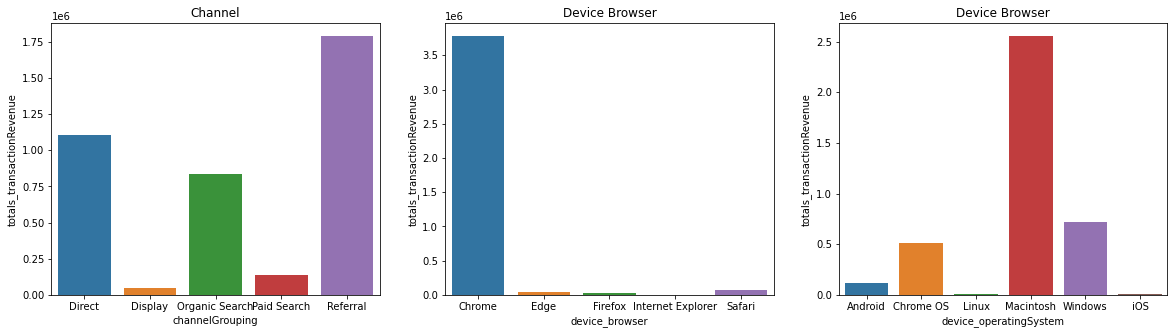

In [103]:
#Group 1
df_group1_channel = df_group1.groupby('channelGrouping').totals_transactionRevenue.sum().reset_index()
df_group1_browser = df_group1.groupby('device_browser').totals_transactionRevenue.sum().reset_index()
df_group1_os = df_group1.groupby('device_operatingSystem').totals_transactionRevenue.sum().reset_index()

fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.barplot(ax=axes[0], x=df_group1_channel.channelGrouping, y=df_group1_channel.totals_transactionRevenue)
axes[0].set_title("Channel")

sns.barplot(ax=axes[1], x=df_group1_browser.device_browser, y=df_group1_browser.totals_transactionRevenue)
axes[1].set_title("Device Browser")

sns.barplot(ax=axes[2], x=df_group1_os.device_operatingSystem, y=df_group1_os.totals_transactionRevenue)
axes[2].set_title("Device Browser")

Text(0.5, 1.0, 'Device Browser')

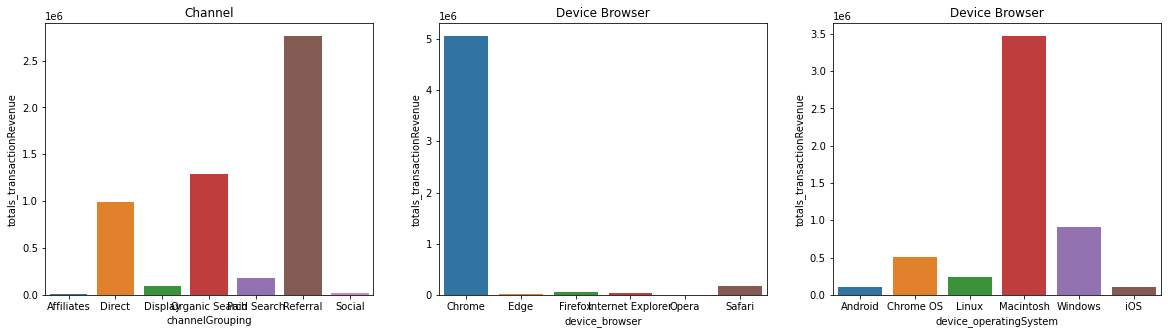

In [104]:
#Group 3
df_group1_channel = df_group2.groupby('channelGrouping').totals_transactionRevenue.sum().reset_index()
df_group1_browser = df_group2.groupby('device_browser').totals_transactionRevenue.sum().reset_index()
df_group1_os = df_group2.groupby('device_operatingSystem').totals_transactionRevenue.sum().reset_index()

fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.barplot(ax=axes[0], x=df_group1_channel.channelGrouping, y=df_group1_channel.totals_transactionRevenue)
axes[0].set_title("Channel")

sns.barplot(ax=axes[1], x=df_group1_browser.device_browser, y=df_group1_browser.totals_transactionRevenue)
axes[1].set_title("Device Browser")

sns.barplot(ax=axes[2], x=df_group1_os.device_operatingSystem, y=df_group1_os.totals_transactionRevenue)
axes[2].set_title("Device Browser")